In [1]:
using  Pkg

#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("Plots")
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\write\.julia\environments\v1.11\Manifest.toml`


In [2]:
using CSV, DataFrames, Statistics, Random, Plots, StatsPlots

In [3]:
c=CSV.read("../dat/bottle.csv",DataFrame)

Row,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
,Int64,Int64,String15,String,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,String31?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,missing,25.649,missing,missing,missing,3,1,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,0.0,10.5,10.5,33.44,25.64,233.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,missing
2,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,missing,25.656,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,8.0,10.46,10.46,33.44,25.65,232.5,0.01,missing,missing,missing,missing,missing,missing,missing,missing,missing,8,missing,missing,missing,missing,missing,missing,missing,missing
3,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,missing,25.654,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,10.46,10.46,33.437,25.65,232.8,0.02,missing,missing,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
4,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,missing,25.643,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,19.0,10.45,10.45,33.42,25.64,234.1,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,19,missing,missing,missing,missing,missing,missing,missing,missing
5,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,missing,25.643,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,20.0,10.45,10.45,33.421,25.64,234.0,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,20,missing,missing,missing,missing,missing,missing,missing,missing
6,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,missing,25.651,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,30.0,10.45,10.45,33.431,25.65,233.5,0.07,missing,missing,missing,missing,missing,missing,missing,missing,missing,30,missing,missing,missing,missing,missing,missin

In [4]:
typeof(c)

DataFrame

In [5]:
dataShape=size

size (generic function with 231 methods)

In [6]:
dataShape(c)

(864863, 74)

In [7]:
function dataType(df::DataFrame)
    return Dict(column => eltype(dropmissing(df)[:,column]) for column in names(df))
end

dataType (generic function with 1 method)

In [8]:
dataType(c)

Dict{String, DataType} with 74 entries:
  "pH2"        => Float64
  "SiO3uM"     => Float64
  "LightP"     => Float64
  "MeanAp"     => Int64
  "Cst_Cnt"    => Int64
  "TA2"        => Float64
  "R_O2"       => Float64
  "R_DYNHT"    => Float64
  "TA1"        => Float64
  "O2Satq"     => Int64
  "DarkAs"     => Float64
  "PO4q"       => Int64
  "R_SVA"      => Float64
  "NH3q"       => Int64
  "R_NO3"      => Float64
  "T_qual"     => Int64
  "R_SALINITY" => Float64
  "O2ml_L"     => Float64
  "S_prec"     => Int64
  ⋮            => ⋮

In [9]:
function count_missing(df::DataFrame,col)
    return count(x -> ismissing(x), df[!, col])
end

count_missing (generic function with 1 method)

In [10]:
count_missing(c,"Salnty")

47354

In [11]:
function dataMissingPercentage(df::DataFrame)
    # Create a DataFrame with the column names and their missing value counts
    nrows=dataShape(df)[1]
    df=DataFrame(Column = names(df), MissingCount = map(column -> count(ismissing, df[!, column]), names(df)))
    df[!,"MissingPercentage"]=df[:,"MissingCount"]*100/nrows
    return df
end

dataMissingPercentage (generic function with 1 method)

In [12]:
dataMissingPercentage(c)

Row,Column,MissingCount,MissingPercentage
,String,Int64,Float64
1,Cst_Cnt,0,0.0
2,Btl_Cnt,0,0.0
3,Sta_ID,0,0.0
4,Depth_ID,0,0.0
5,Depthm,0,0.0
6,T_degC,10963,1.2676
7,Salnty,47354,5.47532
8,O2ml_L,168662,19.5016
9,STheta,52689,6.09218


In [13]:
function deleteColumns(df::DataFrame,threshold)
    return select(c,Not(filter(:MissingPercentage => x->x>threshold, dataMissingPercentage(c))[:,:Column]))
end

deleteColumns (generic function with 1 method)

In [14]:
deleteColumns(c,20)

Row,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
,Int64,Int64,String15,String,Int64,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64
1,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,missing,25.649,3,1,2,9,9,9,9,9,0.0,10.5,10.5,33.44,25.64,233.0,0.0,missing,0
2,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,missing,25.656,3,2,2,9,9,9,9,9,8.0,10.46,10.46,33.44,25.65,232.5,0.01,missing,8
3,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,missing,25.654,7,2,3,9,9,9,9,9,10.0,10.46,10.46,33.437,25.65,232.8,0.02,missing,10
4,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,missing,25.643,3,2,2,9,9,9,9,9,19.0,10.45,10.45,33.42,25.64,234.1,0.04,missing,19
5,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,missing,25.643,7,2,3,9,9,9,9,9,20.0,10.45,10.45,33.421,25.64,234.0,0.04,missing,20
6,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,missing,25.651,7,2,3,9,9,9,9,9,30.0,10.45,10.45,33.431,25.65,233.5,0.07,missing,30
7,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.44,missing,25.658,3,2,2,9,9,9,9,9,39.0,10.45,10.45,33.44,25.65,233.0,0.09,missing,39
8,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,missing,25.682,7,2,3,9,9,9,9,9,50.0,10.24,10.23,33.424,25.68,231.0,0.11,missing,50
9,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.42,missing,25.71,3,2,2,9,9,9,9,9,58.0,10.06,10.05,33.42,25.71,228.5,0.13,missing,58


In [15]:
function calculateCorrelation(df::DataFrame)
    num=filter(((k,v),) -> v <:Number, dataType(df))
    c=length(num)
    corr=ones(c,c)
    df=select(df,collect(keys(num)))
    for i in 1:c
        for j in 1:i
            if i!=j
                cols=select(df,i,j)
                cols=dropmissing(cols)
                try
                    corr[i,j]=cor(cols[:,1],cols[:,2])
                catch 
                    corr[i,j]=NaN
                end
            end
            corr[j,i]=corr[i,j]
            
        end
    end
    return corr, df
end

calculateCorrelation (generic function with 1 method)

In [16]:
calculateCorrelation(c)[1]

70×70 Matrix{Float64}:
   1.0        -0.332629    NaN            …  -0.237752    NaN
  -0.332629    1.0          -0.205175        -0.165857      0.00403258
 NaN          -0.205175      1.0             -0.216017     -0.101203
 NaN           0.348318     -0.199436         0.0583196     0.0597614
  -0.262587   -0.0548841    -0.361108         0.00236733   -0.00295357
   0.57809     0.984449     -2.91733e-14  …  -0.259642    NaN
   0.171664   -0.894005      0.155375         0.188103     -0.00397683
   0.336146    0.911596     -0.428507        -0.209682      0.00267293
   0.616844    0.953625      0.321037        -0.0275346   NaN
 NaN          -0.0920407     0.328138         0.0491092   NaN
   ⋮                                      ⋱               
 NaN           0.00402518   -0.0118525        0.00103983    1.0
  -0.259082   -0.0527185    -0.36916          0.00589653   -0.0028208
  -0.0924298  -0.157375     -0.00653367       0.273526    NaN
 NaN           0.367346     -0.198508         0.075

In [17]:
function displayCorrelation(df::DataFrame)
        matrix,data=calculateCorrelation(df)
        len=size(matrix)[1]
        heatmap(1:len,
        1:len,
        (x,y)->matrix[len+1-y,x],
        xticks=(1:len,names(data)),
        yticks=(1:len,reverse(names(data))),
        xrotation=90,
        size=(1000,1000))
end

displayCorrelation (generic function with 1 method)

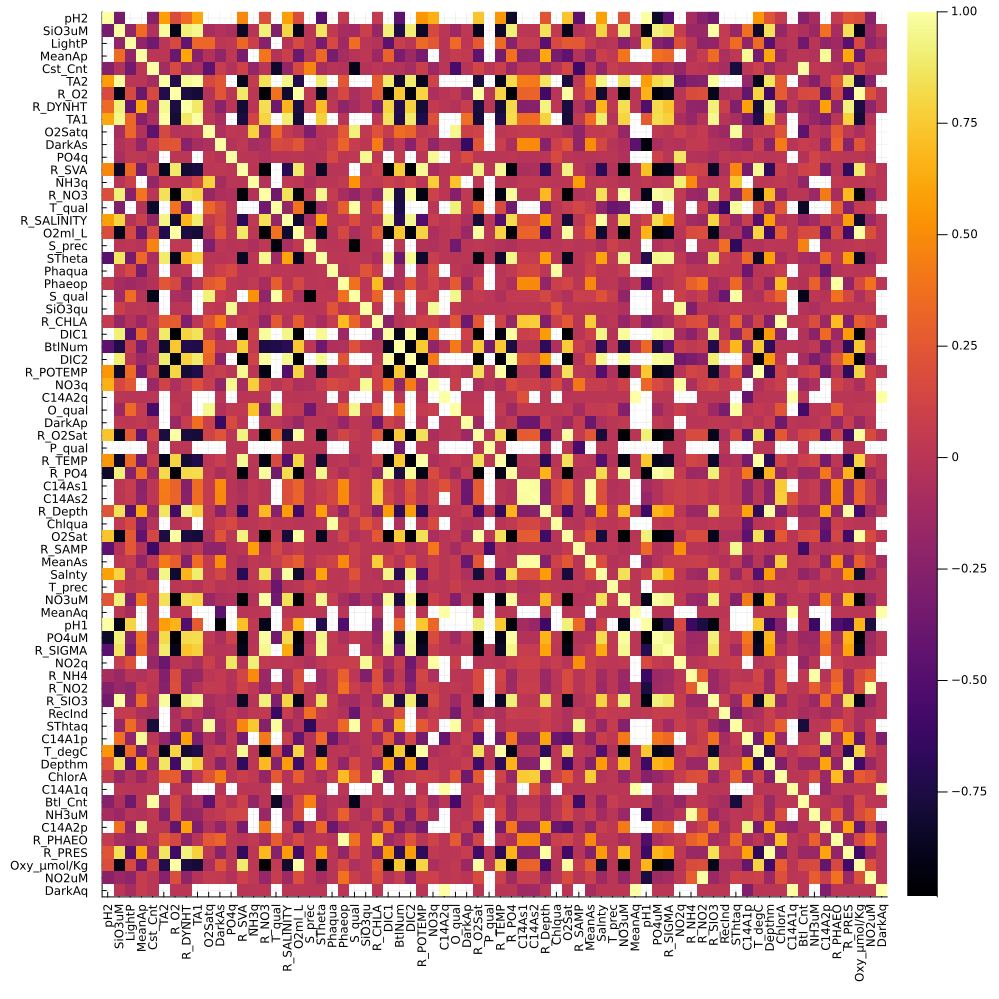

In [18]:
displayCorrelation(c)

In [19]:
function removeOutliersIQR(df::DataFrame)
    limits(q)=[q[1]-(1.5*(q[2]-q[1])),q[2]+(1.5*(q[2]-q[1]))]
    num=filter(((k,v),) -> v <:Number, dataType(df))
    quantiles=Dict(column=>limits(quantile(collect(skipmissing(df[:,column])),[0.25,0.75])) for column in collect(keys(num)))
    for column in collect(keys(num))
        df=filter(Symbol(column)=>x->(ismissing(x))||(quantiles[column][1]<=x<=quantiles[column][2]),df)
        println(size(df))
    end
    return df
end

removeOutliersIQR (generic function with 1 method)

In [20]:
removeOutliersIQR(c)

(864863, 74)
(859626, 74)
(857294, 74)
(857294, 74)
(857294, 74)
(857294, 74)
(857294, 74)
(842414, 74)
(842413, 74)
(828538, 74)
(826816, 74)
(826557, 74)
(825984, 74)
(820653, 74)
(820648, 74)
(820648, 74)
(818110, 74)
(818110, 74)
(818110, 74)
(818106, 74)
(818015, 74)
(803422, 74)
(803422, 74)
(803378, 74)
(794401, 74)
(794401, 74)
(794401, 74)
(794401, 74)
(792057, 74)
(790977, 74)
(790974, 74)
(786752, 74)
(786752, 74)
(786752, 74)
(786751, 74)
(786642, 74)
(786642, 74)
(786509, 74)
(786501, 74)
(751721, 74)
(751721, 74)
(751721, 74)
(732022, 74)
(731867, 74)
(731867, 74)
(714442, 74)
(714442, 74)
(714442, 74)
(714442, 74)
(714442, 74)
(714442, 74)
(714405, 74)
(712042, 74)
(679801, 74)
(679801, 74)
(679801, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679335, 74)
(679333, 74)
(679333, 74)
(679333, 74)
(679332, 74)


Row,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
,Int64,Int64,String15,String,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,String31?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,missing,25.656,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,8.0,10.46,10.46,33.44,25.65,232.5,0.01,missing,missing,missing,missing,missing,missing,missing,missing,missing,8,missing,missing,missing,missing,missing,missing,missing,missing
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,missing,25.654,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,10.46,10.46,33.437,25.65,232.8,0.02,missing,missing,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,missing,25.643,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,19.0,10.45,10.45,33.42,25.64,234.1,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,19,missing,missing,missing,missing,missing,missing,missing,missing
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,missing,25.643,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,20.0,10.45,10.45,33.421,25.64,234.0,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,20,missing,missing,missing,missing,missing,missing,missing,missing
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,missing,25.651,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,30.0,10.45,10.45,33.431,25.65,233.5,0.07,missing,missing,missing,missing,missing,missing,missing,missing,missing,30,missing,missing,missing,missing,missing,missing,missing,missing
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.44,missing,25.658,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,39.0,10.45,10.45,33.44,25.65,233.0,0.09,missing,missing,missing,missing,missing,missing,missing,missing,missing,39,missing,missing,missing,missing,missing

In [ ]:
function deleteRow(df::DataFrame,column)
    return filter(Symbol(column)=>!ismissing,df)
end


deleteRow (generic function with 1 method)

In [28]:
deleteRow(c,"O2Sat")

Row,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
,Int64,Int64,String15,String,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,String31?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,71,2162,044.0 048.5,19-4904CR-HY-087-0606-04400485-0006A-3,6,18.46,32.92,6.02,23.568,111.8,262.663,missing,3,2,8,2,missing,9,missing,8,8,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,6.0,18.46,missing,32.92,missing,missing,0.01,6.02,94.6,missing,missing,missing,missing,missing,missing,missing,6,missing,missing,missing,missing,missing,missing,missing,missing
2,79,2410,026.0 102.0,19-4904CR-HY-094-1118-02601020-0010A-3,10,17.24,32.66,6.23,23.664,112.9,271.8,missing,3,2,8,2,missing,9,missing,8,8,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,17.24,missing,32.66,missing,missing,0.02,6.23,97.2,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
3,94,2867,049.0 114.0,19-4904CR-HY-098-2318-04901140-0010A-3,10,7.62,32.81,6.17,25.609,91.3,268.672,missing,3,2,8,2,missing,9,missing,8,8,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,7.62,missing,32.81,missing,missing,0.03,6.17,101.1,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
4,95,2897,048.0 124.0,19-4904CR-HY-099-0542-04801240-0010A-3,10,5.8,32.86,5.28,25.886,74.9,229.855,missing,3,2,8,2,missing,9,missing,8,8,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,5.8,missing,32.86,missing,missing,0.03,5.28,86.5,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
5,96,2928,046.7 133.0,19-4904CR-HY-099-1154-04671330-0010A-3,10,3.49,32.83,5.92,26.109,79.3,257.66,missing,3,2,8,2,missing,9,missing,8,8,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,3.49,missing,32.83,missing,missing,0.03,5.92,96.9,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
6,105,3216,069.0 144.0,19-4904HO-HY-095-0336-06901440-0050A-3,50,9.17,33.71,5.38,26.082,82.9,234.163,missing,3,2,8,2,missing,9,missing,8,8,missing,9,missing,9,0.29,missing,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,50.0,9.17,missing,33.71,missing,missing,0.14,5.38,92.8,missing,0.29,missing,missing,missing,missing,missing,50,missing,missing,missing,missing,missing,missing,missing,missing
7,112,3413,061.0 087.0,19-4904HO-HY-09

In [ ]:
function calculateCorrelation(df::DataFrame)
    num=filter(((k,v),) -> v <:Number, dataType(df))
    c=length(num)
    corr=ones(c,c)
    df=select(df,collect(keys(num)))
    for i in 1:c
        for j in 1:i
            if i!=j
                cols=select(df,i,j)
                cols=dropmissing(cols)
                try
                    corr[i,j]=cor(cols[:,1],cols[:,2])
                catch 
                    corr[i,j]=NaN
                end
            end
            corr[j,i]=corr[i,j]
            
        end
    end
    return corr, df
end

In [29]:
function filterColumnsByCorrelation(df::DataFrame,target,threshold,relation)
    filteredColumns=[]
    num=filter(((k,v),) -> v <:Number, dataType(df))
    cols=collect(keys(num))
    cols=filter(x->x!=target,cols)
    for c in cols
        data=dropmissing(select(df,target,c))
        corr=cor(data[:,1],data[:,2])
        if (abs(corr)>threshold) && (relation=="greater")
            push!(filteredColumns,c)
        elseif (abs(corr)<threshold) && (relation=="lesser")
            push!(filteredColumns,c)
        end
    end
    return select(df,Not(filteredColumns))
end


    

filterColumnsByCorrelation (generic function with 1 method)

In [32]:
filterColumnsByCorrelation(c,"T_degC",0.8,"lesser")

Row,Sta_ID,Depth_ID,T_degC,STheta,O2Sat,PO4uM,SiO3uM,NO3uM,IncTim,R_TEMP,R_POTEMP,R_SIGMA,R_SVA,R_O2Sat,R_SIO3,R_PO4,R_NO3,DIC1,DIC2,TA2,DIC Quality Comment
,String15,String,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,10.5,25.649,missing,missing,missing,missing,missing,10.5,10.5,25.64,233.0,missing,missing,missing,missing,missing,missing,missing,missing
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,10.46,25.656,missing,missing,missing,missing,missing,10.46,10.46,25.65,232.5,missing,missing,missing,missing,missing,missing,missing,missing
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.46,25.654,missing,missing,missing,missing,missing,10.46,10.46,25.65,232.8,missing,missing,missing,missing,missing,missing,missing,missing
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,10.45,25.643,missing,missing,missing,missing,missing,10.45,10.45,25.64,234.1,missing,missing,missing,missing,missing,missing,missing,missing
5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,10.45,25.643,missing,missing,missing,missing,missing,10.45,10.45,25.64,234.0,missing,missing,missing,missing,missing,missing,missing,missing
6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,10.45,25.651,missing,missing,missing,missing,missing,10.45,10.45,25.65,233.5,missing,missing,missing,missing,missing,missing,missing,missing
7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,10.45,25.658,missing,missing,missing,missing,missing,10.45,10.45,25.65,233.0,missing,missing,missing,missing,missing,missing,missing,missing
8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,10.24,25.682,missing,missing,missing,missing,missing,10.24,10.23,25.68,231.0,missing,missing,missing,missing,missing,missing,missing,missing
9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,10.06,25.71,missing,missing,missing,missing,missing,10.06,10.05,25.71,228.5,missing,missing,missing,missing,missing,missing,missing,missing


In [33]:
describe(c)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Cst_Cnt,17138.8,1,16848.0,34404,0,Int64
2,Btl_Cnt,432432.0,1,432432.0,864863,0,Int64
3,Sta_ID,,001.0 168.0,,176.7 030.0,0,String15
4,Depth_ID,,19-4903CR-HY-060-0930-05400560-0000A-3,,20-1611SR-PR-324-1700-07670700-0516A-3,0,String
5,Depthm,226.832,0,125.0,5351,0,Int64
6,T_degC,10.7997,1.44,10.06,31.14,10963,"Union{Missing, Float64}"
7,Salnty,33.8404,28.431,33.863,37.034,47354,"Union{Missing, Float64}"
8,O2ml_L,3.39247,-0.01,3.44,11.13,168662,"Union{Missing, Float64}"
9,STheta,25.8194,20.934,25.996,250.784,52689,"Union{Missing, Float64}"


In [34]:
GC.gc()